In [14]:
library(corrplot)
library(tidyverse)

In [2]:
file<-read.csv("NY_Best_Seller_Data_Final.csv")

In [3]:
#outliers detection and capping
#max weeks on the list
quantile(file$max_no_weeks_on_list,c(0,0.01,0.05,.5,0.75,0.80,0.90,0.95,0.98,0.99,1))
file$capp_max_no_week_on_list<-ifelse(file$max_no_weeks_on_list>=17,17,file$max_no_weeks_on_list )
file$class_text_numeric<-ifelse(file$class_text=="pos",1,ifelse(file$class_text=="neg",0," ") )

0%     1%     5%    50%    75%    80%    90%    95%    98%    99%   100% 
  0.00   0.00   0.00   2.00   5.00   6.00  10.00  17.00  36.48  58.87 102.00

In [4]:
#no of reviews 
quantile(file$no_of_reviews,c(0,0.01,0.05,.5,0.75,0.80,0.90,0.95,0.98,0.99,1))
file$capp_no_of_reviews<-ifelse(file$no_of_reviews>=3300,3300,file$no_of_reviews)


0%       1%       5%      50%      75%      80%      90%      95% 
   61.00   135.04   223.95   799.00  1583.50  1927.40  3384.10  4662.00 
     98%      99%     100% 
 7987.38  9963.70 58107.00

In [5]:
#price numeric
quantile(file$price_numeric,c(0,0.01,0.05,.5,0.75,0.80,0.90,0.95,0.98,0.99,1))
file$capp_price_numeric<-ifelse(file$price_numeric>=25,25,file$price_numeric)

0%       1%       5%      50%      75%      80%      90%      95% 
  0.2500   1.0269   5.8570  14.3100  16.1800  16.7040  18.9080  20.4630 
     98%      99%     100% 
 25.6778  36.6078 169.5700

In [6]:
frame<-data.frame(max_no_weeks_on_list=file$capp_max_no_week_on_list,ratings=file$ratings_numeric,reviews_count=file$capp_no_of_reviews,price=file$capp_price_numeric,polarity_score=file$polarity_score)



In [7]:
frame_numeric<-cor(frame)
frame_numeric

,max_no_weeks_on_list,ratings,reviews_count,price,polarity_score
max_no_weeks_on_list,1.00000000,-0.01928031,0.74552159,0.02574599,-0.02937715
ratings,-0.01928031,1.00000000,0.14871557,0.06424482,-0.07094628
reviews_count,0.74552159,0.14871557,1.00000000,0.04043881,-0.02039156
price,0.02574599,0.06424482,0.04043881,1.00000000,0.02303256
polarity_score,-0.02937715,-0.07094628,-0.02039156,0.02303256,1.00000000


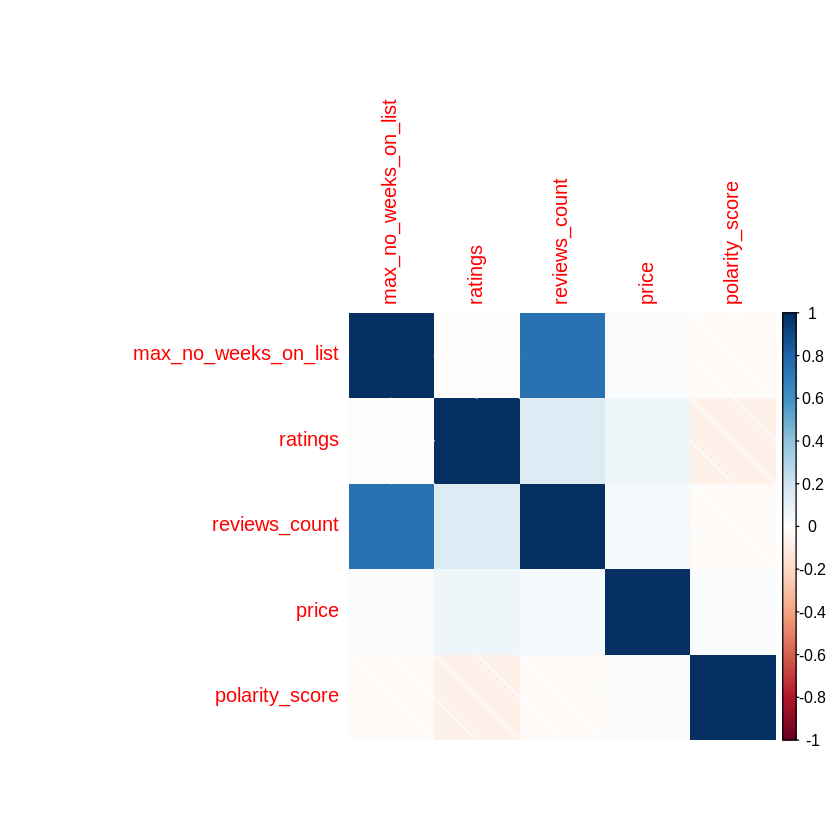

In [8]:
corrplot(frame_numeric,method = 'shade')

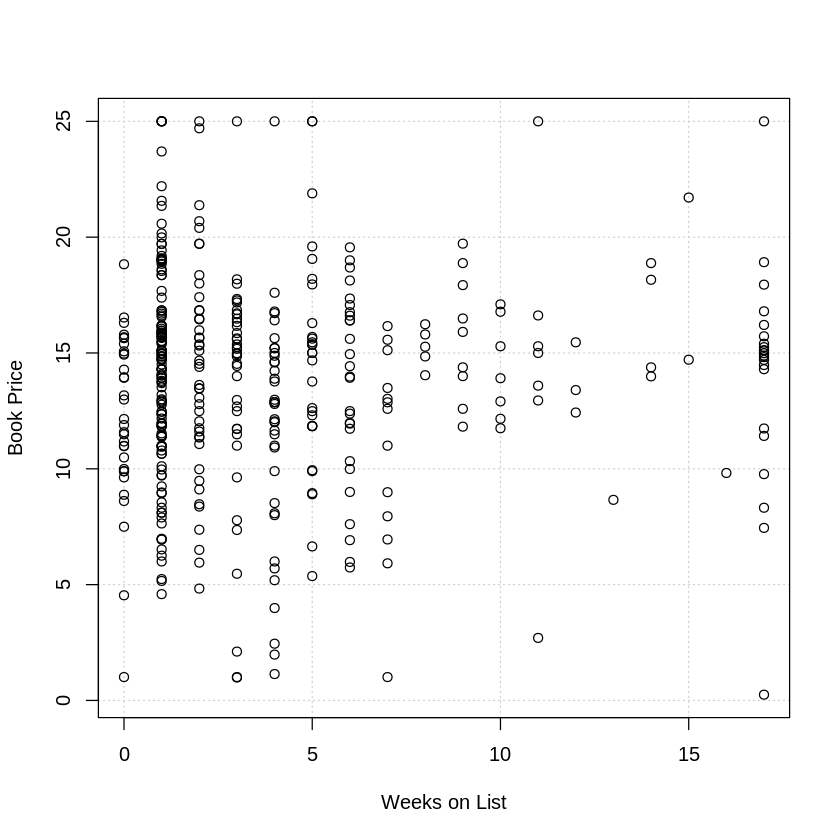

In [9]:
plot(file$capp_max_no_week_on_list,file$capp_price_numeric,xlab ="Weeks on List",ylab = "Book Price",panel.first = grid() )

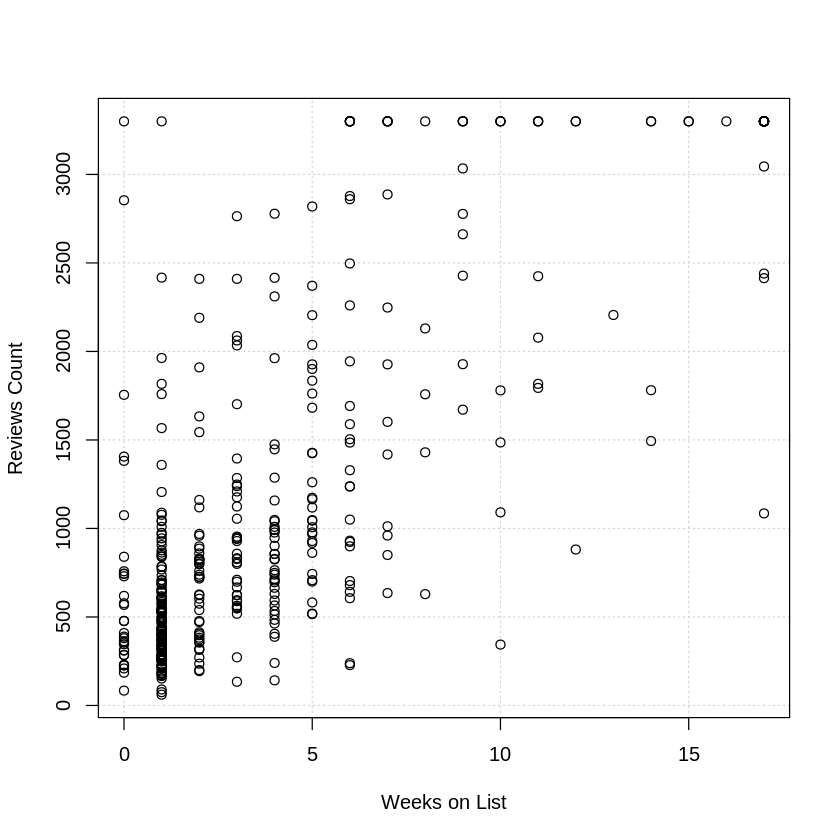

In [10]:
plot(file$capp_max_no_week_on_list,file$capp_no_of_reviews,xlab ="Weeks on List",ylab = "Reviews Count",panel.first = grid() )

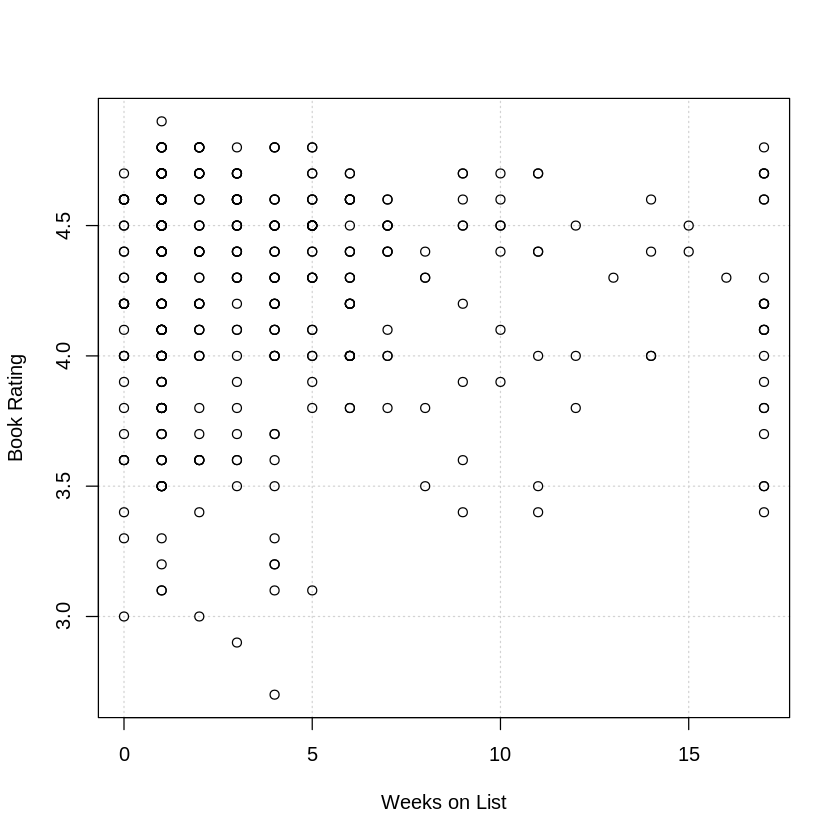

In [11]:
plot(file$capp_max_no_week_on_list,file$ratings_numeric,xlab ="Weeks on List",ylab = "Book Rating",panel.first = grid() )

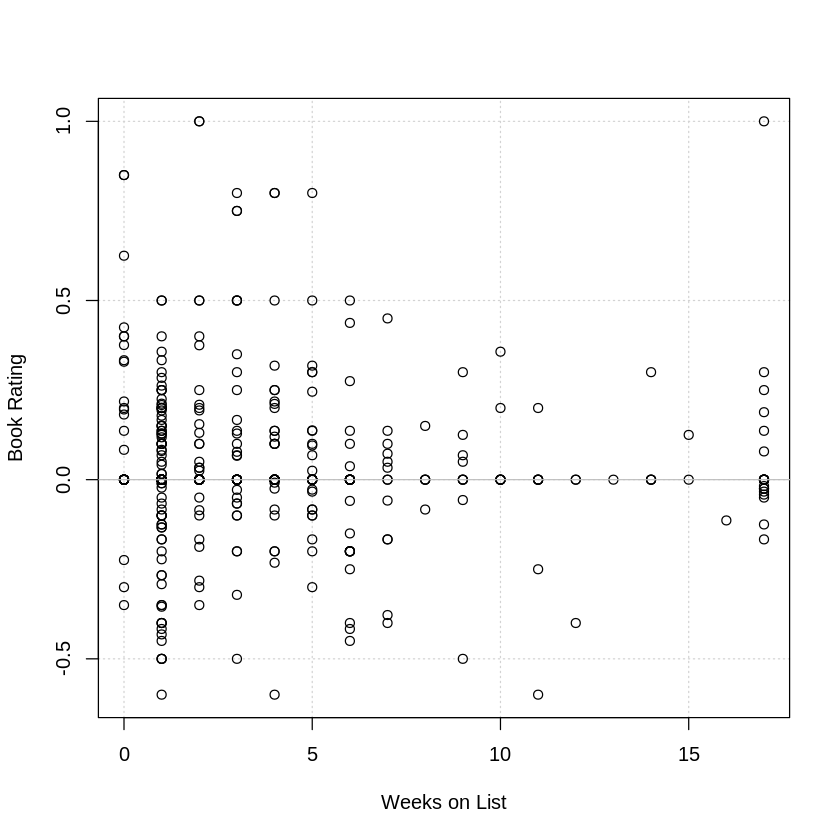

In [12]:
plot(file$capp_max_no_week_on_list,file$polarity_score,xlab ="Weeks on List",ylab = "Book Rating",panel.first = grid() )
abline(h=0, col="grey")

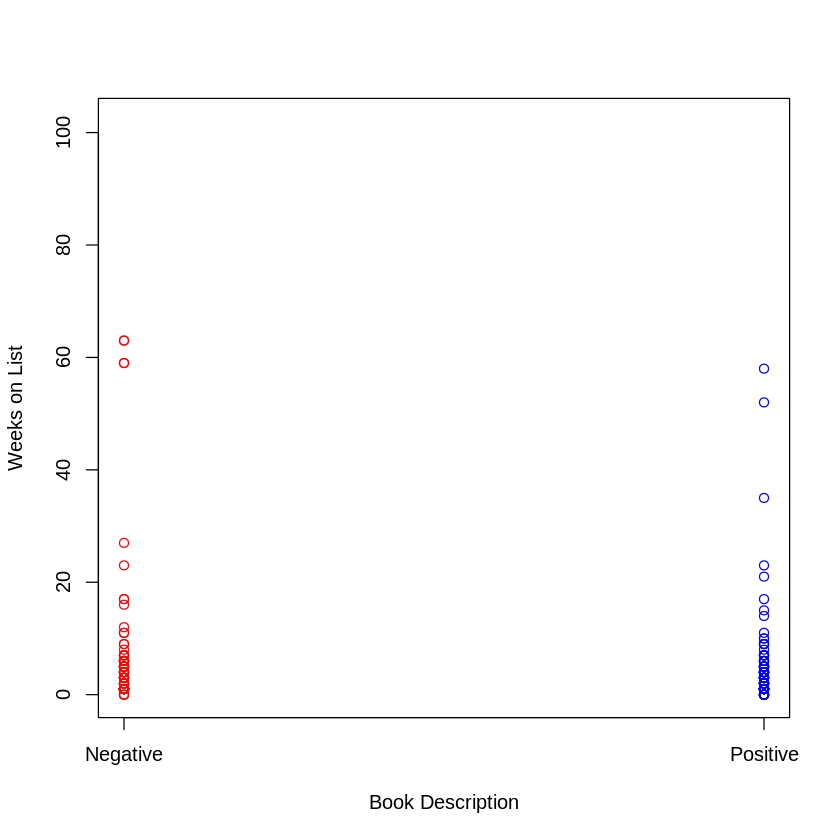

In [13]:
# Set new column values to appropriate colours
file$Colour[file$class_text_numeric==0]="red"
file$Colour[file$class_text_numeric==1]="blue"
# Plot all points at once, using newly generated colours
plot(file$class_text_numeric,file$max_no_weeks_on_list,col=file$Colour,ylab = "Weeks on List",xlab="Book Description",xaxt ='n' )
axis(1, at=0:1, labels=c("Negative","Positive"))